<a href="https://colab.research.google.com/github/Ericjr-a/Ericjr-a_Churning_Customers/blob/main/EricAfari_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

In [299]:
data_info = data.info()
missing_values = data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [300]:
data_info

In [301]:
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Preprocessing

In [302]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [303]:
data.dropna(inplace=True)

In [304]:
data.drop('customerID', axis=1, inplace=True)

In [305]:
churn_data_cleaned = data.dropna(subset=['TotalCharges'])


In [306]:
remaining_missing_values = churn_data_cleaned.isnull().sum().sum()
remaining_missing_values

0

In [307]:
churn_data_cleaned.shape

(7032, 20)

Feature Engineering

In [308]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Churn'] = labelencoder.fit_transform(data['Churn'])

In [309]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'customerID':
        data[col] = labelencoder.fit_transform(data[col])



EDA

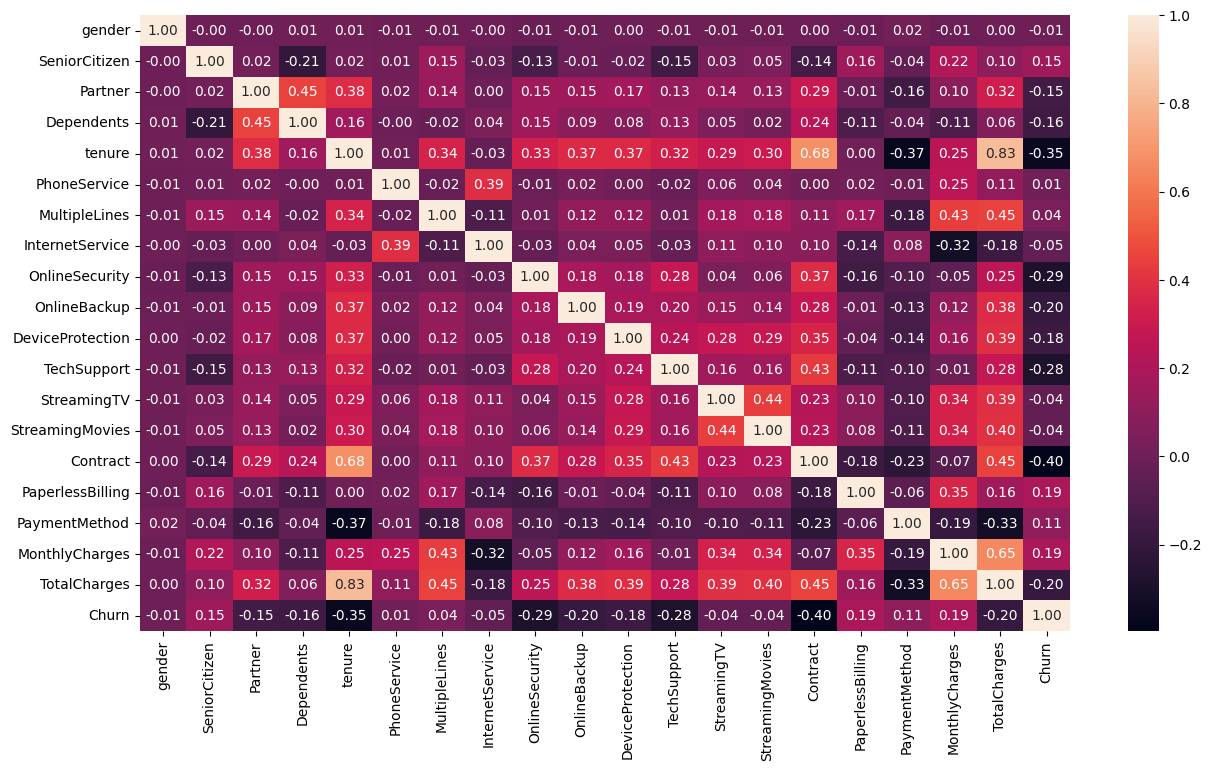

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [311]:
relevant_features = corr.index[abs(corr["Churn"]) > 0.2].tolist()
if 'Churn' in relevant_features:
    relevant_features.remove('Churn')
relevant_features

['tenure', 'OnlineSecurity', 'TechSupport', 'Contract']

In [312]:
for col in data.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        data[col] = LabelEncoder().fit_transform(data[col])

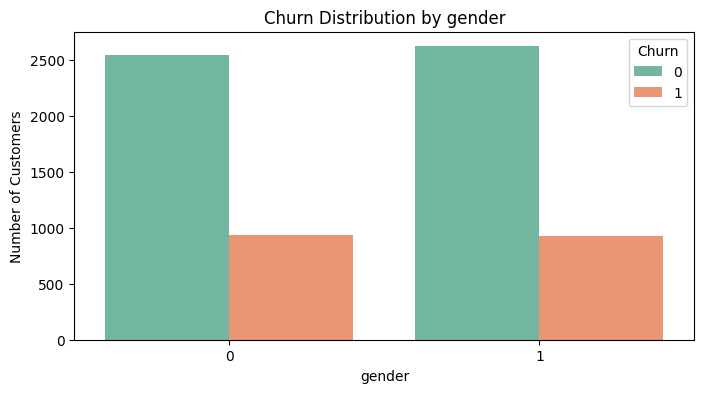

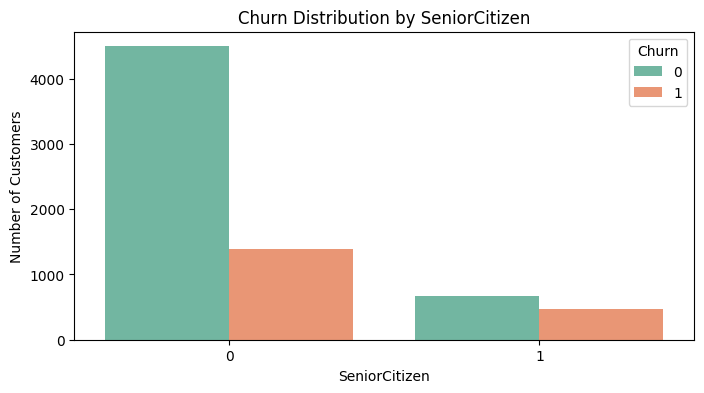

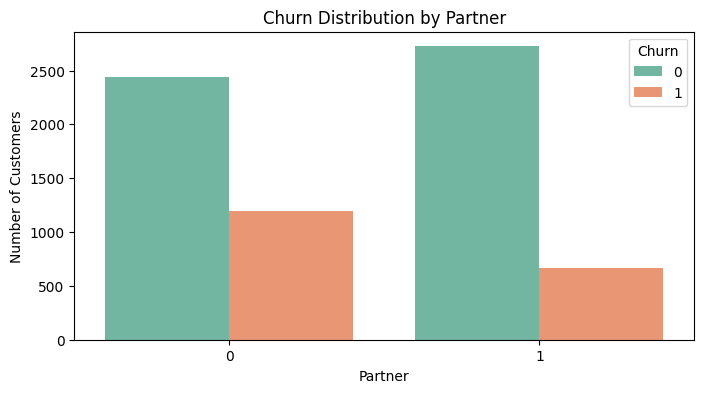

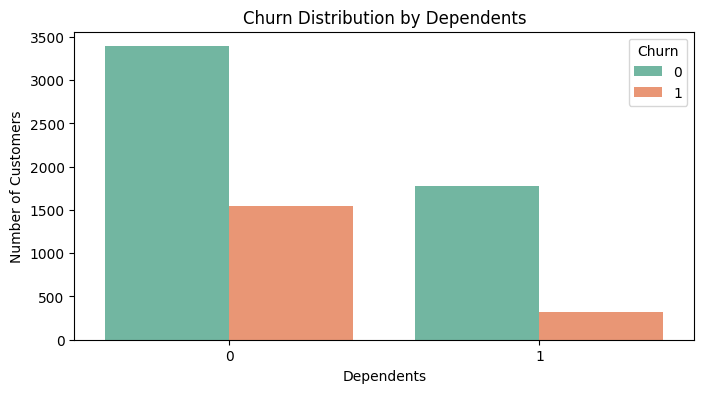

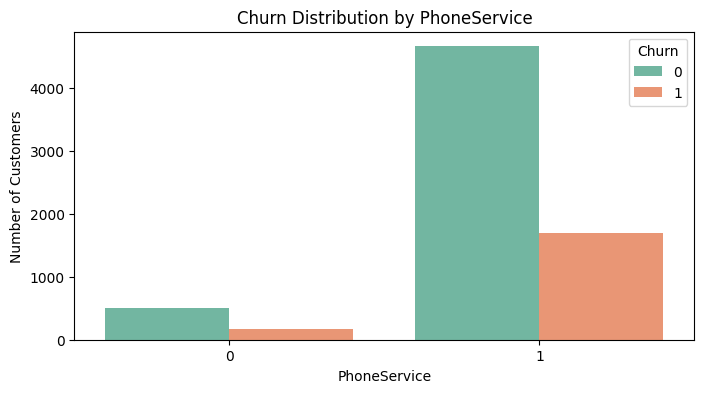

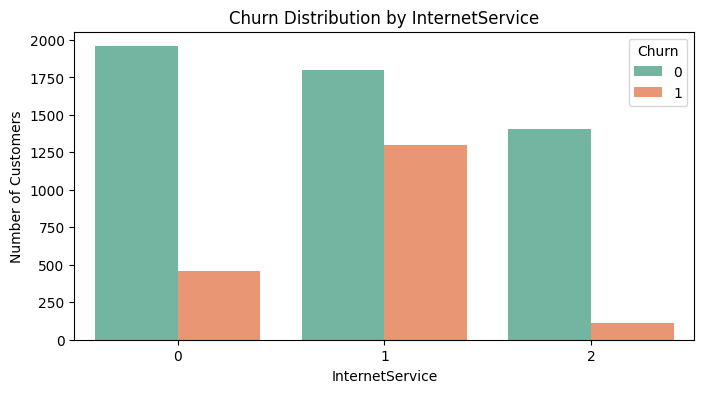

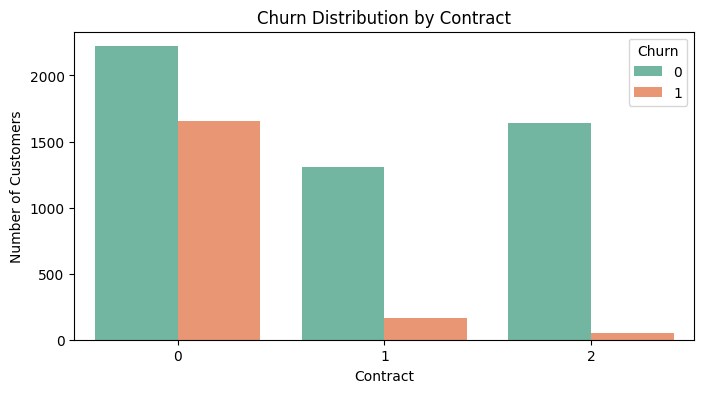

<Figure size 1400x400 with 0 Axes>

<Figure size 1400x400 with 0 Axes>

In [313]:
def plot_churn_distribution(feature):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=data, palette="Set2", hue='Churn')
    plt.title(f'Churn Distribution by {feature}')
    plt.ylabel('Number of Customers')
    plt.show()
features_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract']
for feature in features_to_plot:
    plot_churn_distribution(feature)
plt.figure(figsize=(14, 4))


<Axes: xlabel='Churn', ylabel='tenure'>

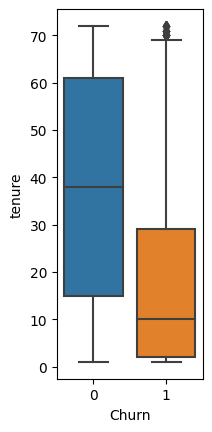

In [314]:
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=data)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

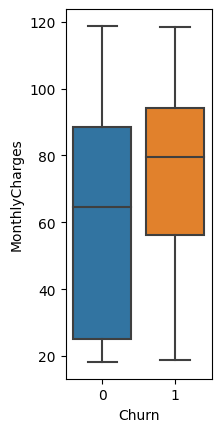

In [315]:
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)


<Axes: xlabel='Churn', ylabel='TotalCharges'>

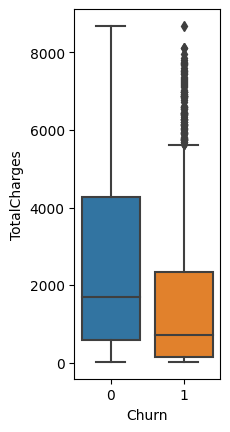

In [316]:
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=data)

Text(0.5, 1.0, 'Tenure Distribution')

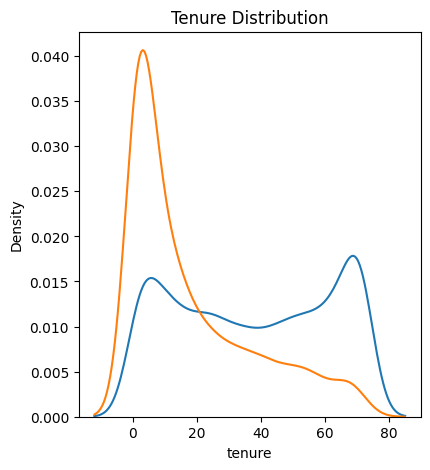

In [317]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.kdeplot(data[data['Churn'] == 0]['tenure'], label='Churn: No')
sns.kdeplot(data[data['Churn'] == 1]['tenure'], label='Churn: Yes')
plt.title('Tenure Distribution')

Text(0.5, 1.0, 'Monthly Charges Distribution')

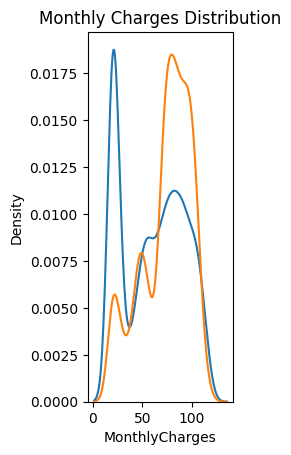

In [318]:
plt.subplot(1, 3, 2)
sns.kdeplot(data[data['Churn'] == 0]['MonthlyCharges'], label='Churn: No')
sns.kdeplot(data[data['Churn'] == 1]['MonthlyCharges'], label='Churn: Yes')
plt.title('Monthly Charges Distribution')

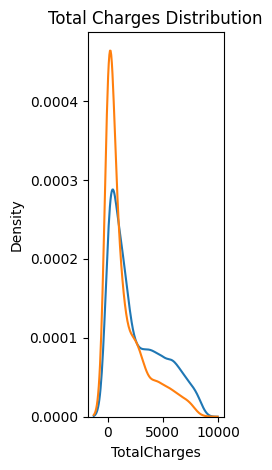

In [319]:
plt.subplot(1, 3, 3)
sns.kdeplot(data[data['Churn'] == 0]['TotalCharges'], label='Churn: No')
sns.kdeplot(data[data['Churn'] == 1]['TotalCharges'], label='Churn: Yes')
plt.title('Total Charges Distribution')
plt.tight_layout()

plt.show()


Building Model and Training

In [320]:
X = data[relevant_features]
y = data['Churn']


In [321]:
import joblib

In [322]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler_model.pkl')


['scaler_model.pkl']

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [324]:
!pip install keras==2.12.0
!pip install keras scikit-learn
!pip install scikeras


In [325]:
from keras.layers import Input, Dense
inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

In [326]:
from keras.models import Model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
141/141 [==============================] - 2s 6ms/step - loss: 0.4943 - accuracy: 0.7713 - val_loss: 0.4526 - val_accuracy: 0.7769
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.7813 - val_loss: 0.4412 - val_accuracy: 0.7813
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 0.7862 - val_loss: 0.4388 - val_accuracy: 0.7831
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4496 - accuracy: 0.7851 - val_loss: 0.4337 - val_accuracy: 0.7813
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.7840 - val_loss: 0.4319 - val_accuracy: 0.7813
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.7844 - val_loss: 0.4341 - val_accuracy: 0.7831
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.7860 - val_loss: 0.4339 - val_accuracy: 0.7760
Epoch 

In [327]:
from keras.models import Sequential
from keras.layers import Activation

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_shape=(X_train.shape[1],), activation=activation))
        else:
            model.add(Dense(nodes, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [328]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size=[128, 256], epochs=[30])


<ipython-input-328-4dcfd877ab46>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Evaluating the model's accuracy and calculating the AUC score

In [329]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)
grid_result.best_score_

0.7848888754844665

In [330]:
best_model = grid_result.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

44/44 [==============================] - 0s 2ms/step


In [331]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

44/44 [==============================] - 0s 2ms/step


0.7803837953091685

In [332]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8115


Saving the model for deployment

In [333]:
best_keras_model = best_model.model

best_keras_model.save('best_model.h5')